<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-deeplearning/blob/master/tkyang/Word2vec%EA%B5%AC%ED%98%84_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CBoW

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
text = 'you will never know until you try'
t_tokens = text.split()
uni_tokens = np.unique(t_tokens)

In [3]:
# 일단 레이블 인코딩 과정을 거쳐서 문자열에 숫자 하나씩 매칭 시켜줘야 함
encoder = LabelEncoder()
encoder.fit(t_tokens)
labels = encoder.transform(t_tokens)

# 2차원 배열로 전환
labels = labels.reshape(-1, 1)

# OneHotEncoder 함수를 변수에 할당시켜서 데이터를 fit 시킨다.
onehot_enc = OneHotEncoder()
onehot_enc.fit(labels)
onehot_enc = onehot_enc.transform(labels)
onehot_enc = onehot_enc.toarray()
onehot_enc

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

In [4]:
# train data X생성, Y생성
window_size = 1

X = []
Y = []
for i in range(len(onehot_enc)):
    for j in range(i-window_size, i+window_size+1):
        if j < 0:
            continue
        if j >= len(onehot_enc):
            break
        if j != i:
            X.append(onehot_enc[j])
            Y.append(onehot_enc[i])
            
Y = np.array(Y)
X = np.array(X)

In [11]:
# W초기화
Hidden_node = 4
W1 = np.random.randn(len(uni_tokens), Hidden_node)
W2 = np.random.randn(Hidden_node,len(uni_tokens))

def Softmax(x):
    return np.exp(x) / sum(np.exp(x))

# Feed Foward
H = np.dot(X, W1)
# o = Softmax(np.dot(H, W2))
o = []
o1 = np.dot(H, W2)
for i,v in enumerate(o1):
    o.append(Softmax(v))
print(o)
loss_ls = []
loss_ls.append(-np.multiply(Y, np.log(o)).sum())
loss_ls

[array([0.05009709, 0.00708295, 0.00258001, 0.69740699, 0.00808459,
       0.23474837]), array([0.00223563, 0.16336897, 0.05748565, 0.06311674, 0.55408394,
       0.15970907]), array([0.02352056, 0.24818835, 0.13625031, 0.32629567, 0.26091305,
       0.00483205]), array([0.05009709, 0.00708295, 0.00258001, 0.69740699, 0.00808459,
       0.23474837]), array([0.4625505 , 0.26669697, 0.2216842 , 0.00727007, 0.02822542,
       0.01357285]), array([0.02352056, 0.24818835, 0.13625031, 0.32629567, 0.26091305,
       0.00483205]), array([0.39541147, 0.02796678, 0.32232844, 0.03348992, 0.08381733,
       0.13698606]), array([0.4625505 , 0.26669697, 0.2216842 , 0.00727007, 0.02822542,
       0.01357285]), array([0.00223563, 0.16336897, 0.05748565, 0.06311674, 0.55408394,
       0.15970907]), array([0.39541147, 0.02796678, 0.32232844, 0.03348992, 0.08381733,
       0.13698606]), array([0.00478423, 0.01362968, 0.03333731, 0.70589299, 0.21783185,
       0.02452394]), array([0.00223563, 0.16336897, 

[30.571624768845428]

[30.571624768845428, 30.543706075736182, 30.51584199909125, 30.48803246511006, 30.460277399384932, 30.43257672690365, 30.404930372052124, 30.377338258617122, 30.349800309789117, 30.32231644816524, 30.29488659575228, 30.267510673969824, 30.240188603653433, 30.21292030505797, 30.18570569786095, 30.158544701166, 30.131437233506432, 30.10438321284886, 30.07738255659689, 30.05043518159497, 30.023541004132156, 29.996699939946193, 29.96991190422742, 29.94317681162293, 29.916494576240737, 29.88986511165401, 29.86328833090538, 29.83676414651135, 29.8102924704667, 29.783873214249077, 29.75750628882352, 29.73119160464712, 29.704929071673767, 29.678718599358856, 29.652560096664182, 29.626453472062803, 29.600398633543975, 29.57439548861817, 29.548443944322138, 29.52254390722399, 29.49669528342839, 29.470897978581725, 29.4451518978774, 29.41945694606111, 29.393813027436224, 29.368220045869133, 29.342677904794723, 29.317186507221834, 29.291745755738773, 29.26635555251888, 29.241015799326107, 29.21572

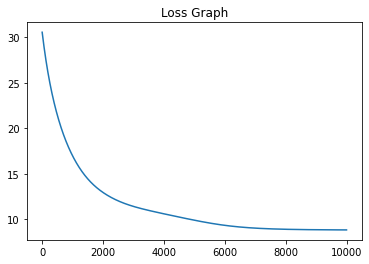

In [12]:
epoch = 10000
for epoch in range(epoch):
    
    # dW2 = H.T * (o-Y)
    # dW1 = X.T * (W2 * (0-Y).T).T
    dW2 = np.dot(H.T, (o-Y))
    dW1 = np.dot(X.T, np.dot(W2, (0-Y).T).T)

    # gradient descent
    learning_rate = 0.0003
    W2 += -learning_rate * dW2
    W1 += -learning_rate * dW1

    H = np.dot(X, W1)
    o1 = np.dot(H, W2)
    o = []
    for i,v in enumerate(o1):
        o.append(Softmax(v))

    loss_ls.append(-np.multiply(Y, np.log(o)).sum())
print(loss_ls)
def Loss_graph(loss_ls):
    plt.plot(loss_ls)
    plt.title('Loss Graph')
    plt.show()

Loss_graph(loss_ls)